Importing the Libiraies 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sn
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.shape

(200, 5)

In [4]:
data.head(5)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Cleaning the datasets 

In [5]:
data = data.drop(columns='CustomerID')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [8]:
data[data.isnull().any(axis = 1)].sum(axis = 1)

Series([], dtype: float64)

In [9]:
data.Age.min()

18

In [10]:
data.Age.max()

70

In [11]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
data['Annual Income (k$)'].min()

15

In [13]:
data['Annual Income (k$)'].max()

137

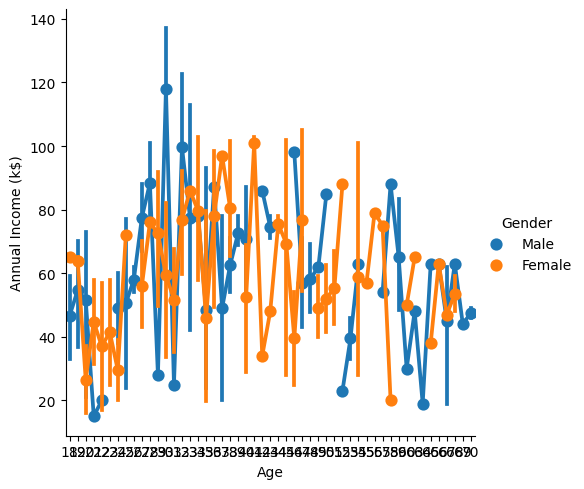

In [14]:
sn.catplot(x = 'Age', y='Annual Income (k$)', hue='Gender',kind='point', data=data)

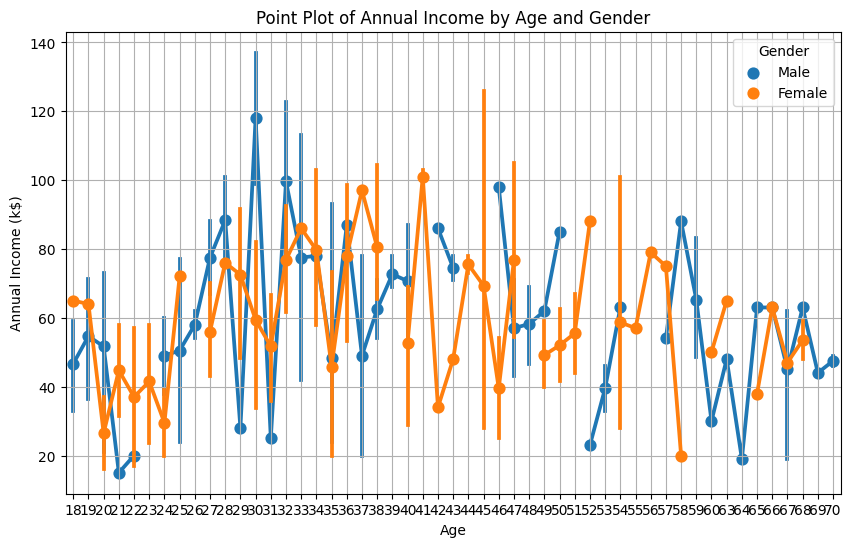

In [15]:
plt.figure(figsize=(10, 6))
sn.pointplot(x='Age', y='Annual Income (k$)', hue='Gender', data=data)
plt.title('Point Plot of Annual Income by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

In [16]:
label = LabelEncoder()
data['Gender'] = label.fit_transform(data['Gender'])

In [17]:
data['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32

Training the Model

In [18]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km =KMeans(n_clusters= k)
    km.fit(data[['Spending Score (1-100)','Annual Income (k$)']])
    sse.append(km.inertia_)

c:\Users\Muhammad Aqeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Muhammad Aqeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Muhammad Aqeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Muhammad Aqeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

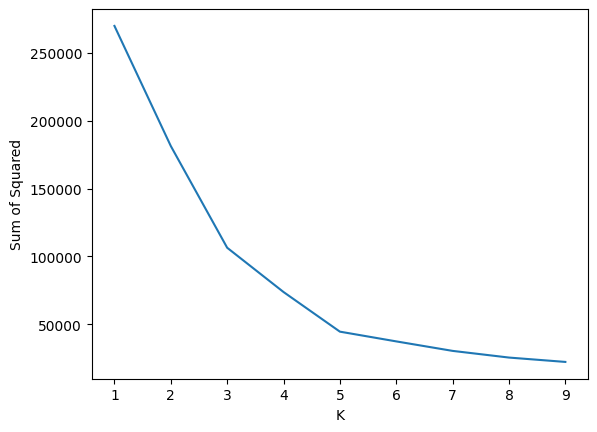

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of Squared')
plt.plot(k_rng,sse)

In [20]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(data[['Spending Score (1-100)','Annual Income (k$)']])
y_predicted

c:\Users\Muhammad Aqeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [21]:
data['cluster'] = y_predicted

In [22]:
data

Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0         1   19                  15                      39        3
1         1   21                  15                      81        0
2         0   20                  16                       6        3
3         0   23                  16                      77        0
4         0   31                  17                      40        3
..      ...  ...                 ...                     ...      ...
195       0   35                 120                      79        2
196       0   45                 126                      28        1
197       1   32                 126                      74        2
198       1   32                 137                      18        1
199       1   30                 137                      83        2

[200 rows x 5 columns]

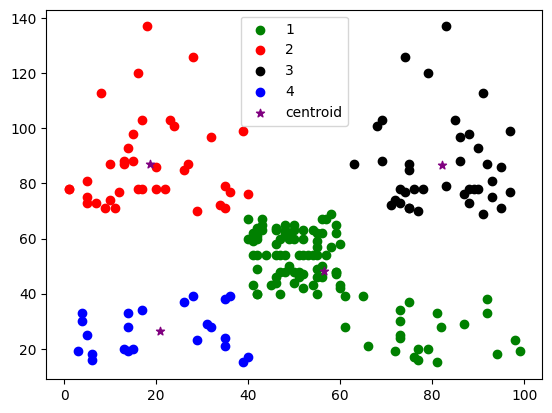

In [23]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
df4 = data[data.cluster==3]
plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'] ,color='green',label='1')
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'] ,color='red',label='2')
plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'] ,color='black',label='3')
plt.scatter(df4['Spending Score (1-100)'],df4['Annual Income (k$)'],color='blue',label='4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()